In [1]:
#import necessary libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#create a dtae parser function
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [3]:
#read the data
icecream_heater_df = pd.read_csv('data/ice_cream_vs_heater.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16684\549704675.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  icecream_heater_df = pd.read_csv('data/ice_cream_vs_heater.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [4]:
#infer the frequency of the data
icecream_heater_df = icecream_heater_df.asfreq(pd.infer_freq(icecream_heater_df.index))

In [5]:
#assign the data to a variable
icecream_heater_ts = icecream_heater_df.heater

In [6]:
#view the heat data time series
icecream_heater_ts

Month
2004-01-01    27
2004-02-01    18
2004-03-01    14
2004-04-01    13
2004-05-01    13
              ..
2020-02-01    34
2020-03-01    25
2020-04-01    25
2020-05-01    27
2020-06-01    24
Freq: MS, Name: heater, Length: 198, dtype: int64

In [10]:
#create a function to plot the time series
def plot_series(series):
    plt.figure(figsize=(10, 5))
    plt.plot(icecream_heater_ts, color = 'red')
    plt.xlabel('Date')
    plt.ylabel('Search frequency for Heater', fontsize=16)

    #iterate the plot from 2004 to 2021
    for year in range(2004, 2021):
        plt.axvline(datetime(year, 1, 1), linestyle='--', color='k', alpha=0.5)
        plt.grid(True)

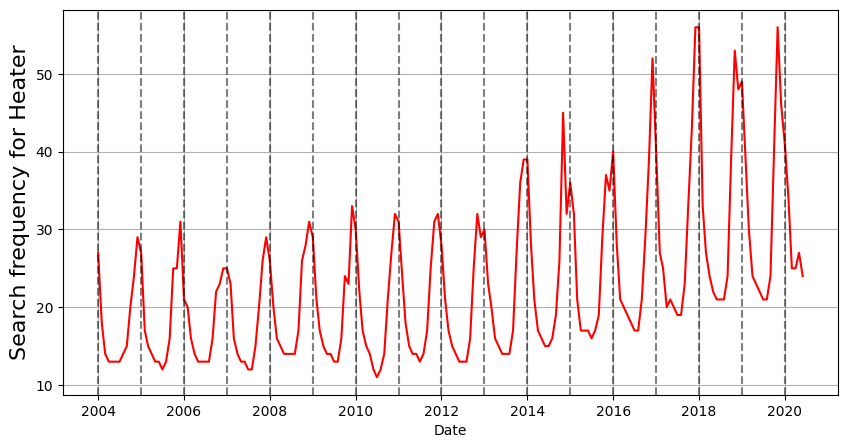

In [11]:
#call the function to plot the time series
plot_series(icecream_heater_ts)

Normalize the plot data to keep within the range of 0 and 1 ish

In [12]:
#assign variables for the mean and standard deviation
avg, dev = icecream_heater_ts.mean(), icecream_heater_ts.std()

In [13]:
#normalize the values in the time series
icecream_heater_ts = (icecream_heater_ts - avg) / dev

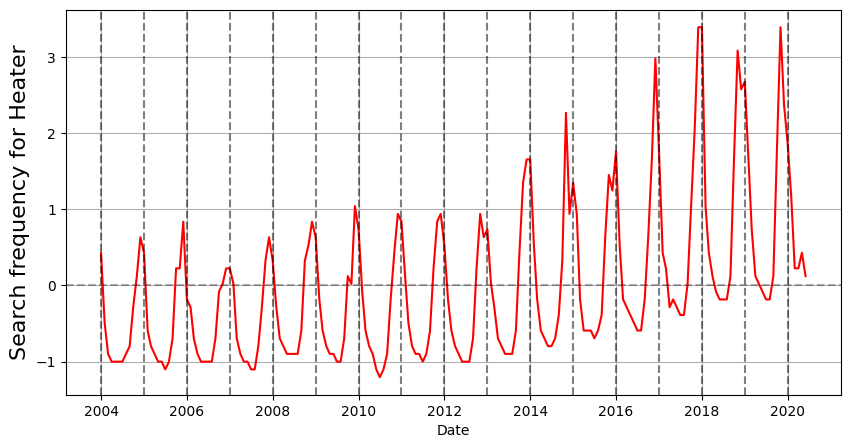

In [14]:
#plot the normalized time series
plot_series(icecream_heater_ts)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

Remove the trend by taking the first difference

In [15]:
#drop the first difference
icecream_heater_ts = icecream_heater_ts.diff().dropna()

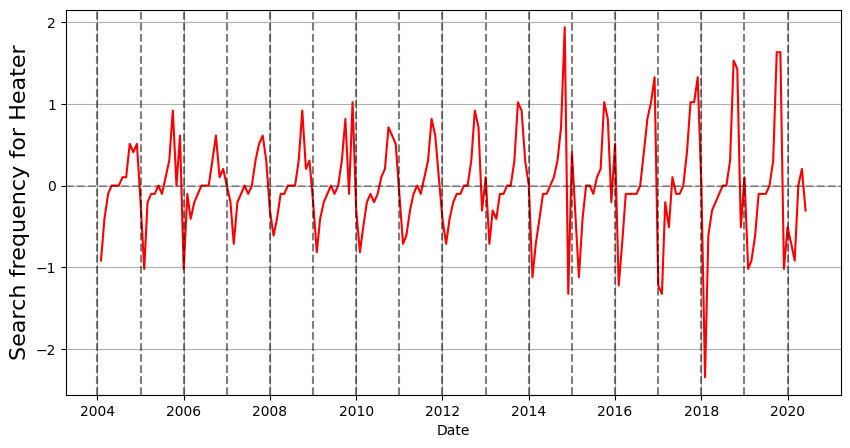

In [16]:
#plot the newly normalized data
plot_series(icecream_heater_ts)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

Remove the increasing volatility

In [17]:
#group the time series data by year
annual_volatility = icecream_heater_ts.groupby(icecream_heater_ts.index.year).std()
annual_volatility

Month
2004    0.415481
2005    0.474527
2006    0.400148
2007    0.359839
2008    0.396182
2009    0.499810
2010    0.459566
2011    0.443924
2012    0.471104
2013    0.503587
2014    0.855743
2015    0.569441
2016    0.719843
2017    0.830886
2018    0.987221
2019    0.892991
2020    0.426657
Name: heater, dtype: float64

In [18]:
#assign the new series without the volatility to a variable
heater_annual_volatility = icecream_heater_ts.index.map(lambda d: annual_volatility.loc[d.year])

In [19]:
heater_annual_volatility

Float64Index([0.41548104705328814, 0.41548104705328814, 0.41548104705328814,
              0.41548104705328814, 0.41548104705328814, 0.41548104705328814,
              0.41548104705328814, 0.41548104705328814, 0.41548104705328814,
              0.41548104705328814,
              ...
               0.8929910269067826,  0.8929910269067826,  0.8929910269067826,
               0.8929910269067826, 0.42665652301411977, 0.42665652301411977,
              0.42665652301411977, 0.42665652301411977, 0.42665652301411977,
              0.42665652301411977],
             dtype='float64', name='Month', length=197)

In [20]:
#modify the series values
icecream_heater_ts = icecream_heater_ts / heater_annual_volatility

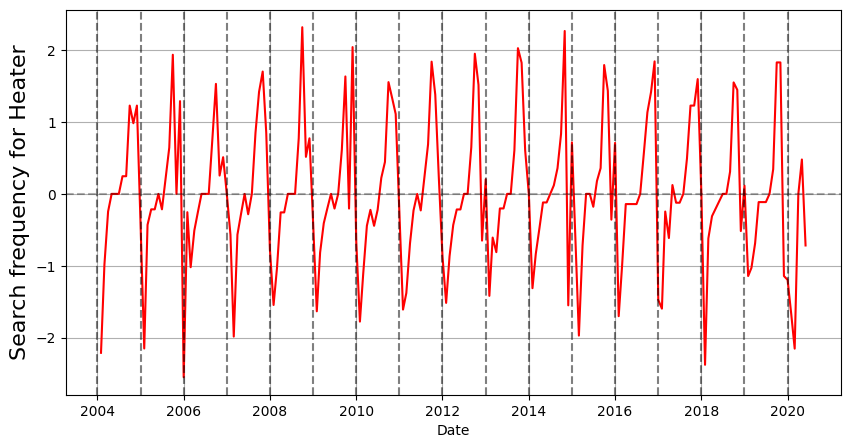

In [24]:
#plot the volatility free time series data
plot_series(icecream_heater_ts)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

Remove seasonality

In [25]:
#get monthly avg of the time series data
monthly_avg = icecream_heater_ts.groupby(icecream_heater_ts.index.month).mean()

In [26]:
monthly_avg

Month
1    -0.428360
2    -1.483129
3    -1.063595
4    -0.442926
5    -0.121663
6    -0.128425
7    -0.107093
8     0.075720
9     0.544638
10    1.613170
11    1.183118
12    0.491641
dtype: float64

In [27]:
#map the monthly avg to the time series data
heater_monthly_avg = icecream_heater_ts.index.map(lambda d: monthly_avg.loc[d.month])

In [28]:
heater_monthly_avg

Float64Index([ -1.4831292771766649,  -1.0635953355687688, -0.44292637101368243,
              -0.12166261572164787, -0.12842542811874375, -0.10709260508002617,
               0.07572031336904017,   0.5446384049209763,   1.6131699911888606,
                1.1831180641276993,
              ...
                0.5446384049209763,   1.6131699911888606,   1.1831180641276993,
                0.4916411242912192,  -0.4283597874466263,  -1.4831292771766649,
               -1.0635953355687688, -0.44292637101368243, -0.12166261572164787,
              -0.12842542811874375],
             dtype='float64', name='Month', length=197)

In [29]:
#modify the time series data
icecream_heater_ts = icecream_heater_ts - heater_monthly_avg

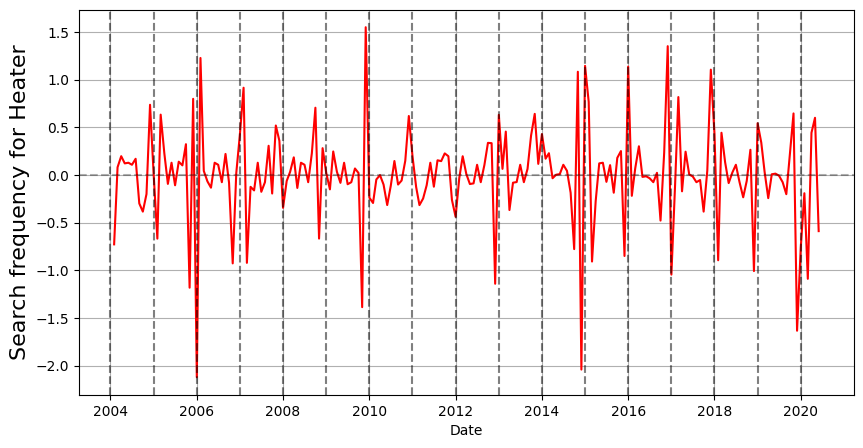

In [30]:
#plot the new time series data
plot_series(icecream_heater_ts)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)